In [4]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first Dataset contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [5]:
# Step 0. Load libraries and custom modules
# ----------------- Common Libraries --------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
from datetime import datetime
from datetime import date
import re
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import download
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from textstat import flesch_kincaid_grade
#-------------- TRANSFORMERS --------------
import transformers
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import pipeline
from evaluate import load
from transformers import Conversation
transformers.logging.set_verbosity_error()

# Data Loading and Cleaning

In [6]:
# Loading the Datasets

# Load Books Rating Dataset
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')
df_rating_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [7]:
df_rating_raw.sample(5, random_state= 5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1107230,B0006AL5RG,"Moby Dick;: Or, The whale,",NaN,A3IDVPHK010YCS,Samson Gebre,2/7,5.0,988502400,A HARD READ BUT WORTH IT IN THE END,Moby Dick is one of the rare novels where I th...
1349418,0786280816,The Warrior: Caleb (Sons of Encouragement Seri...,NaN,A2RN09CHUFKP7V,"N. M. Batten ""nicbat""",4/6,2.0,1125360000,A disappointment,I am an avid reader of Francine Rivers books. ...
1391954,0754054241,Alias Grace: Complete & Unabridged,NaN,A2K9FXOFFHVNWG,"Lilly Flora ""by Lilo Drandoff""",4/5,5.0,1216339200,Amazing Grace: how sweet the read,"""Alias Grace"" is probably the book that sat fo..."
429309,0898795516,Scene and Structure (Elements of Fiction Writing),NaN,A2JANKGO7NCIM6,cile,10/14,5.0,1095552000,For the serious professional,This book is the best book I've read to date o...
1776643,B000K0DB8I,Left Behind - A Novel Of The Earth's Last Days,NaN,A39N6TG3PMIP4J,matt nicolin,0/3,5.0,958435200,The Greatest Story on Earth,When I first picked up this book and started t...


In [8]:
# Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [9]:
df_data_raw.sample(5, random_state= 5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
8704,"The troll garden, (A plume book)",This collection of Willa Cather stories& ... h...,['Willa Cather'],http://books.google.com/books/content?id=2YvWA...,http://books.google.nl/books?id=2YvWAAAAMAAJ&q...,Plume Books,1971,http://books.google.nl/books?id=2YvWAAAAMAAJ&d...,['Man-woman relationships'],1.0
178135,Know Peace Within,Find out what all of the rave is about. See ho...,['L. David Harris'],http://books.google.com/books/content?id=lt-iT...,http://books.google.com/books?id=lt-iTLae00AC&...,Xulon Press,2005-09-01,http://books.google.com/books?id=lt-iTLae00AC&...,['Religion'],NaN
203200,DICTIONARY OF AMERICAN NAVAL FIGHTING SHIPS IN...,NaN,['United States. Naval History Division'],http://books.google.com/books/content?id=zk4SA...,http://books.google.com/books?id=zk4SAAAAYAAJ&...,Department of the Navy,1964,https://play.google.com/store/books/details?id...,['Government publications'],NaN
105072,Real Prophecy Unveiled: Why the Christ Will No...,"Religious hypocrites wage ""holy war"" while the...",['Joseph Adamson'],http://books.google.com/books/content?id=85Uxw...,http://books.google.com/books?id=85Uxwx4nyAsC&...,iUniverse,2002-01,http://books.google.com/books?id=85Uxwx4nyAsC&...,['Religion'],NaN
110546,The Burg: An Italian-American Community at Bay...,A sociological and historical account of the d...,['Peter A. Peroni'],http://books.google.com/books/content?id=NphuA...,http://books.google.nl/books?id=NphuAAAAMAAJ&q...,University Press of Amer,1979,http://books.google.nl/books?id=NphuAAAAMAAJ&d...,['Social Science'],NaN


In [10]:
#Check for Nan Entries
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [11]:
#Check for Nan Entries
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

## Processed Dataset Creation and data cleaning

Innecesary Columns are removed


- **df_rating**: 
    - **Price**: Almost 84% of the entries are null. 
    - **profileName**: Unique identifier for each user performing the review. Variable with cardinality excess. 
    - **User_id**: Unique identifier for each user performing the review. Variable with cardinality excess.
    - **Id**: Innecesary column.
    - **review/summary**: Unncesary column for current analysis. Many summaries used are the same Book Title.
    - **Title Feature Removal**: This feature is unique for each book. And it is extremly correlated with Authors. As the same book Title will always have the same author. So, authors feature is kept and Title is removed. This feature is removed later as it will be used to join both Datasets. 
    - **review/time**: This is the datetime of the review in UTC format. This column is removed as the goal of the model is to be used to predict newer entries in the future. This variable is kept until Dataset reduction by time scope.
- **df_data**:
    - **image**: Out of the Scope
    - **previewLink**: Out of the Scope
    - **infoLink**: Out of the Scope.
    - **ratingsCount**: Information from Google API. Not useful for the analysis.
    - **description**: Non necesary information for Analysis
    - **publishedDate**: Out of the Scope of the current Analysis as newer books will have less oportunity to be reviewed. This variable is kept until Dataset reduction by time scope.

In [12]:
df_rating_processed = df_rating_raw.drop(['Id','profileName', 'User_id','Price','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [13]:
df_rating_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 5 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Title               object 
 1   review/helpfulness  object 
 2   review/score        float64
 3   review/time         int64  
 4   review/text         object 
dtypes: float64(1), int64(1), object(3)
memory usage: 114.4+ MB


In [14]:
df_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Title          212403 non-null  object
 1   authors        180991 non-null  object
 2   publisher      136518 non-null  object
 3   publishedDate  187099 non-null  object
 4   categories     171205 non-null  object
dtypes: object(5)
memory usage: 8.1+ MB


Renaming the Columns

In [15]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title',                                                        
                                                        'review/helpfulness': 'helpfulness',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [16]:
df_rating_processed.isna().sum()

title          208
helpfulness      0
review           0
review_time      0
text             8
dtype: int64

In [17]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

As both datasets are going to be merged by Title, Rows with Null Title are removed.

Drop rows from df_data_processed where everything except title is null

In [18]:
df_rating_processed = df_rating_processed.dropna(subset=['text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [19]:
df_data_processed.sample(5, random_state= 5)

,title,authors,publisher,published_date,categories
5333,What Mrs. McGillicuddy Saw,['Agatha Christie'],G.P. Putnam's Sons,1987,['Fiction']
151095,Research Method in the Postmodern (Educational...,['James Scheurich'],Routledge,2014-01-02,['Education']
132579,Integer and Combinatorial Optimization (Wiley ...,"['Laurence A. Wolsey', 'George L. Nemhauser']",John Wiley & Sons,1999-07-08,['Mathematics']
90645,President's Lady: A Novel about Rachel and And...,['Irving Stone'],Thomas Nelson Inc,1996-08-30,['Fiction']
100653,"Flying Colors (Hornblower Saga, Number 7)",['C. S. Forester'],Pinnacle Books,1981-02-01,['Fiction']


### Published Year Preprocesing 
Convert published date to year
- Found 143 published_date entries with the format YYYY*: The character * is removed.
- Found 76 published_date entries with the format YYY?: Last digit of the year is got from the rounded mean value from 0 to 9, 5 is used 
- Found 52 published_date entries with the format YY??: Mean of the published year from the entire data set is calculated

In [20]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [21]:
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [22]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [23]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(5, random_state= 5)

,title,authors,publisher,categories,published_year
5333,What Mrs. McGillicuddy Saw,['Agatha Christie'],G.P. Putnam's Sons,['Fiction'],1987
151095,Research Method in the Postmodern (Educational...,['James Scheurich'],Routledge,['Education'],2014
132579,Integer and Combinatorial Optimization (Wiley ...,"['Laurence A. Wolsey', 'George L. Nemhauser']",John Wiley & Sons,['Mathematics'],1999
90645,President's Lady: A Novel about Rachel and And...,['Irving Stone'],Thomas Nelson Inc,['Fiction'],1996
100653,"Flying Colors (Hornblower Saga, Number 7)",['C. S. Forester'],Pinnacle Books,['Fiction'],1981


### Convert Authors and Categories Lists to Python Lists

In [24]:
def custom_string_to_list(str_list):
    if isinstance(str_list, str):
        return [item.strip(" '[]") for item in str_list.split(',')]
    else:
        return str_list

In [25]:
df_data_processed['authors'] = df_data_processed['authors'].apply(custom_string_to_list)
df_data_processed['categories'] = df_data_processed['categories'].apply(custom_string_to_list)

In [26]:
df_data_processed.sample(5, random_state=5)

,title,authors,publisher,categories,published_year
5333,What Mrs. McGillicuddy Saw,[Agatha Christie],G.P. Putnam's Sons,[Fiction],1987
151095,Research Method in the Postmodern (Educational...,[James Scheurich],Routledge,[Education],2014
132579,Integer and Combinatorial Optimization (Wiley ...,"[Laurence A. Wolsey, George L. Nemhauser]",John Wiley & Sons,[Mathematics],1999
90645,President's Lady: A Novel about Rachel and And...,[Irving Stone],Thomas Nelson Inc,[Fiction],1996
100653,"Flying Colors (Hornblower Saga, Number 7)",[C. S. Forester],Pinnacle Books,[Fiction],1981


In [27]:
df_rating_processed.sample(5, random_state=5)

,title,helpfulness,review,review_time,text
198489,MORNING AND EVENING BASED ON THE NEW INTERNATI...,56/57,5.0,1043625600,Charles Spurgeon is one of those brilliant Chr...
230571,The Book of the Dead,2/6,3.0,1149292800,"It's still a Preston/Child book, and I love Pe..."
2429051,"Devlin's Honor (Sword of Change, Book 2)",4/6,1.0,1067299200,Slooooooow reading. Lingers on and on. Extreme...
1828352,Atrazine in Kansas,24/25,5.0,1030320000,If you are like I was before I read this book ...
1787237,Typhoon,2/2,4.0,1096675200,i read the book in 2 days. it was so good i co...


### Review time is converted to Datetime and then the year of the review is extracted

In [28]:
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

### Helpfulness is converted to a percentaje

Helpfulness feature represents the proportion of the reactions from other users to the review that found helpful the review.

$$ helpfulness = \frac{review found helpful reaction}{review found helpful + review not found reactions}$$

It is converted to a porcentual value.

In [29]:
def get_helpfulness_as_porcentual_value_0(x):
    if  x == '0/0':
        return 0
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor
    
def get_helpfulness_as_porcentual_value_1(x):
    if  x == '0/0':
        return 1
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor

In [30]:
df_rating_processed['helpfulness_0'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_0(x))
df_rating_processed['helpfulness_1'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_1(x))
df_rating_processed = df_rating_processed.drop(['helpfulness'], axis=1)

In [31]:
df_rating_processed.sample(5, random_state=5)

,title,review,text,review_year,helpfulness_0,helpfulness_1
198489,MORNING AND EVENING BASED ON THE NEW INTERNATI...,5.0,Charles Spurgeon is one of those brilliant Chr...,2003,0.982456,0.982456
230571,The Book of the Dead,3.0,"It's still a Preston/Child book, and I love Pe...",2006,0.333333,0.333333
2429051,"Devlin's Honor (Sword of Change, Book 2)",1.0,Slooooooow reading. Lingers on and on. Extreme...,2003,0.666667,0.666667
1828352,Atrazine in Kansas,5.0,If you are like I was before I read this book ...,2002,0.960000,0.960000
1787237,Typhoon,4.0,i read the book in 2 days. it was so good i co...,2004,1.000000,1.000000


### Both Datasets are Merged
Both Datasets are Merged by the Title and Title feature is removed

In [32]:
df_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   review          float64
 2   text            object 
 3   review_year     int64  
 4   helpfulness_0   float64
 5   helpfulness_1   float64
 6   authors         object 
 7   publisher       object 
 8   categories      object 
 9   published_year  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 203.4+ MB


In [33]:
df_processed = df_processed.drop(['title'], axis=1)
df_processed.sample(5)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
1261792,3.0,The very first review sums this book up really...,1999,0.00,1.00,[Thomas Harris],Delta,[Fiction],2012
2649948,4.0,"In general, I enjoyed reading this book. Dr. F...",2005,0.75,0.75,[Sinclair B. Ferguson],IVP Academic,[Religion],1997
2289898,5.0,I bought this book for one of my daughter's sc...,2011,0.00,0.00,[John Steinbeck],Lulu.com,[California],1937
1339798,5.0,"I got the The Art of The Lord of the Rings, be...",2004,1.00,1.00,[Gary Russell],Houghton Mifflin Harcourt,[Performing Arts],2002
226192,4.0,"One of the first views of dystopian society, i...",2007,0.00,0.00,[Aldous Huxley],Random House,[Fiction],2008


## Dataset Filtering and Sampling

The hypotesis of the current analysis is predicting the review score of the review, based on the review and book information contained on this dataset.


- Microsoft Internet Explorer was first release on 1995
- Google was released on August 1996
- Yahoo! was resleased on 1994

Web Browsers History
- Safari was first released on 2003
- Firefox was first released on 2004
- Opera Browser was first release on 2005
- Google Chrome was first released on 2008
- Microsoft Edge was first released on 2015

Review Year: Based on the tools (web browsers, access to internet, culture, digitalization) available during the last decade of the reviews on the Dataset, the scope of the analysis is reduced to reviews performed from 2003 and until 2013 to evaluate the reviews on an equivalent base.

In [34]:
df_processed['review_year'].describe().T

count    2.666314e+06
mean     2.005394e+03
std      4.747336e+00
min      1.969000e+03
25%      2.001000e+03
50%      2.005000e+03
75%      2.010000e+03
max      2.013000e+03
Name: review_year, dtype: float64

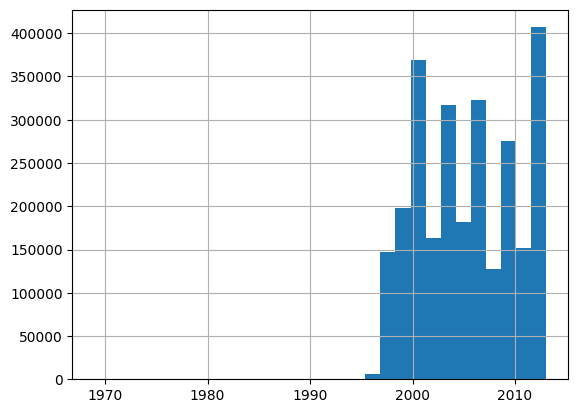

In [35]:
df_processed['review_year'].hist(bins=30)
plt.show()

In [36]:
df_processed = df_processed[df_processed['review_year']>=2003]
df_processed.reset_index(drop=True, inplace=True)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782972 entries, 0 to 1782971
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   review          float64
 1   text            object 
 2   review_year     int64  
 3   helpfulness_0   float64
 4   helpfulness_1   float64
 5   authors         object 
 6   publisher       object 
 7   categories      object 
 8   published_year  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 122.4+ MB


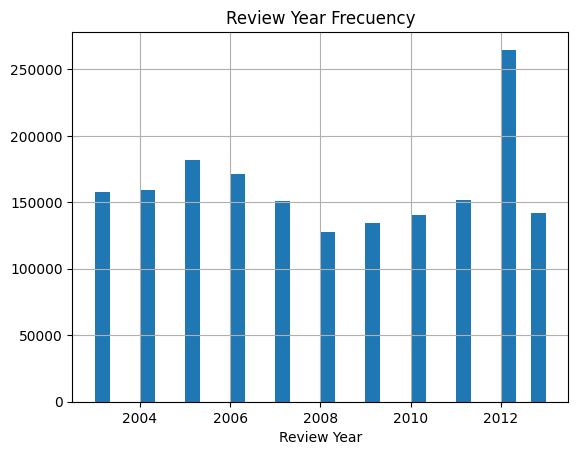

In [37]:
df_processed['review_year'].hist(bins=30)
plt.title('Review Year Frecuency')
plt.xlabel('Review Year')
plt.show('Frecuency')
plt.show()

Dataset is filtered by published year. Amazon Books was founded on 1995. Books published before this year are removed from the dataset. Scope is reduced to Books published during the Amazon Books Web Store existance.

In [38]:
df_processed = df_processed[(df_processed['published_year'] > 2003) & (df_processed['published_year'] <= 2013)]
df_processed.reset_index(drop=True, inplace=True)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736644 entries, 0 to 736643
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          736644 non-null  float64
 1   text            736644 non-null  object 
 2   review_year     736644 non-null  int64  
 3   helpfulness_0   736644 non-null  float64
 4   helpfulness_1   736644 non-null  float64
 5   authors         728054 non-null  object 
 6   publisher       677789 non-null  object 
 7   categories      720895 non-null  object 
 8   published_year  736644 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 50.6+ MB


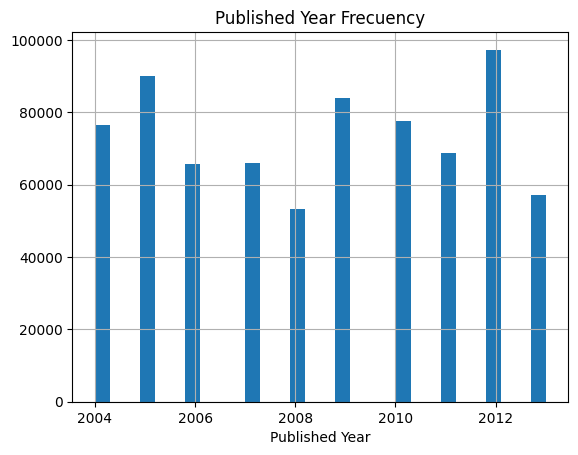

In [39]:
df_processed['published_year'].hist(bins=30)
plt.title('Published Year Frecuency')
plt.xlabel('Published Year')
plt.show('Frecuency')

All the wrong entries where the review year is grather than the published year are removed

In [40]:
df_processed = df_processed[df_processed['review_year'] >= df_processed['published_year']]
df_processed.reset_index(drop=True, inplace=True)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400982 entries, 0 to 400981
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   review          400982 non-null  float64
 1   text            400982 non-null  object 
 2   review_year     400982 non-null  int64  
 3   helpfulness_0   400982 non-null  float64
 4   helpfulness_1   400982 non-null  float64
 5   authors         395251 non-null  object 
 6   publisher       363953 non-null  object 
 7   categories      393307 non-null  object 
 8   published_year  400982 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 27.5+ MB


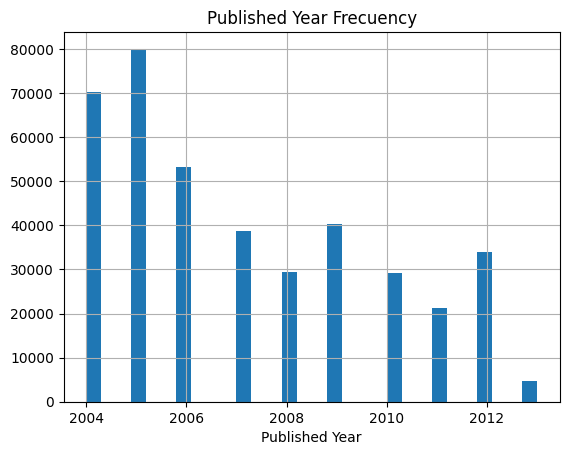

In [41]:
df_processed['published_year'].hist(bins=30)
plt.title('Published Year Frecuency')
plt.xlabel('Published Year')
plt.show('Frecuency')

### Sampling

Sample Size Calculation formula from Survey Monkey (https://www.surveymonkey.com/mp/sample-size-calculator/) is used to calculate a extract a ramdom sample of the dataset.
In order to reduce the dataset size and apply NLP to the text column.

For the given formula: 

   $$ sample size =  \frac{\frac{z^2xp(1-p)}{e^2}}{1 + \frac{z^2xp(1-p)}{e^2N}} $$

with:
- N = population size 
- e = Margin of error (percentage in decimal form) 
- z = z-score
- p = sample proportion


| Desired confidence level	| z-score |
|--------------------------|---------|
|            80%           |   1.28  |
|            85%	         |   1.44  |
|            90%	         |   1.65  |
|            95%	         |   1.96  |
|            99%	         |   2.58  |


Setting N = 400 982, e = 0.1% and z = 2.58

sample size = 15978. 

A sample of **15978** entries will be extracted from the Dataset to be processed and to train and test the model.

In [42]:
N = df_processed.shape[0] - 1
e = 0.01 #Margin of error = 0.1%
z = 2.58 # Desired confidence level = 99%, so z-score = 2.58
p = 0.5 #Used 0.5 as a conservative approach. It will give the largest sample size

sample_size = ( ((z*z)*p*(1-p))/(e*e) )/(1 + ((z*z)*p*(1-p))/(e*e*N) )

sample_size = round(sample_size)

print(f'Sample size is: {sample_size}')

Sample size is: 15978


In [43]:
df_processed = df_processed.sample(n=sample_size, random_state=2125)

In [44]:
df_processed.reset_index(drop=True, inplace=True)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15978 entries, 0 to 15977
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          15978 non-null  float64
 1   text            15978 non-null  object 
 2   review_year     15978 non-null  int64  
 3   helpfulness_0   15978 non-null  float64
 4   helpfulness_1   15978 non-null  float64
 5   authors         15747 non-null  object 
 6   publisher       14523 non-null  object 
 7   categories      15681 non-null  object 
 8   published_year  15978 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


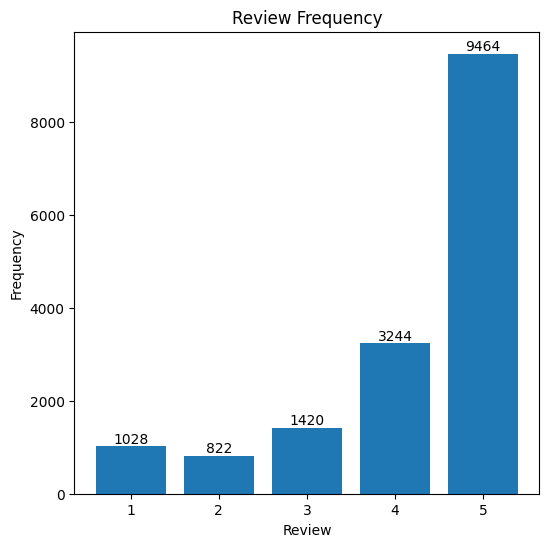

In [50]:
fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(df_processed['review'].value_counts(ascending=True).keys(), df_processed['review'].value_counts(ascending=True))
ax.bar_label(bars)
plt.title('Review Frequency')
plt.xlabel('Review')
plt.ylabel('Frequency')
plt.show()

In [51]:
df_processed.isna().sum()

review               0
text                 0
review_year          0
helpfulness_0        0
helpfulness_1        0
authors            231
publisher         1455
categories         297
published_year       0
dtype: int64

In [53]:
df_processed.sample(5, random_state=5)

,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
7657,2.0,The main character thinks too much to herself....,2009,1.0,1.0,[Julie K. L. Dam],Grand Central Publishing,[Fiction],2007
12375,3.0,Ordered this based on positive reviews from ot...,2009,0.5,0.5,NaN,NaN,"[""Children's libraries""]",2005
4644,5.0,Mike Reiss is one of the funniest guys in the ...,2006,0.5,0.5,"[Mike Reiss, David Catrow]",Puffin,[Juvenile Fiction],2006
1023,4.0,Those observations given by Mr.Henderson insid...,2004,0.0,1.0,"[Thomas Henderson, Frank Luksa]",Sports Publishing LLC,[Sports & Recreation],2004
10233,4.0,Have not finished reading - read in high schoo...,2013,0.0,1.0,[Charles Dickens],Prestwick House Inc,[Executions and executioners],2005


### Drop Duplicates

In [54]:
df_processed = df_processed.drop_duplicates(subset=['review', 'text'])
df_processed.reset_index(drop=True, inplace=True)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15738 entries, 0 to 15737
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          15738 non-null  float64
 1   text            15738 non-null  object 
 2   review_year     15738 non-null  int64  
 3   helpfulness_0   15738 non-null  float64
 4   helpfulness_1   15738 non-null  float64
 5   authors         15507 non-null  object 
 6   publisher       14295 non-null  object 
 7   categories      15441 non-null  object 
 8   published_year  15738 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


## Data Cleaning by Column

In this section a final cleaning for specific columns is performed

### Helpfulness

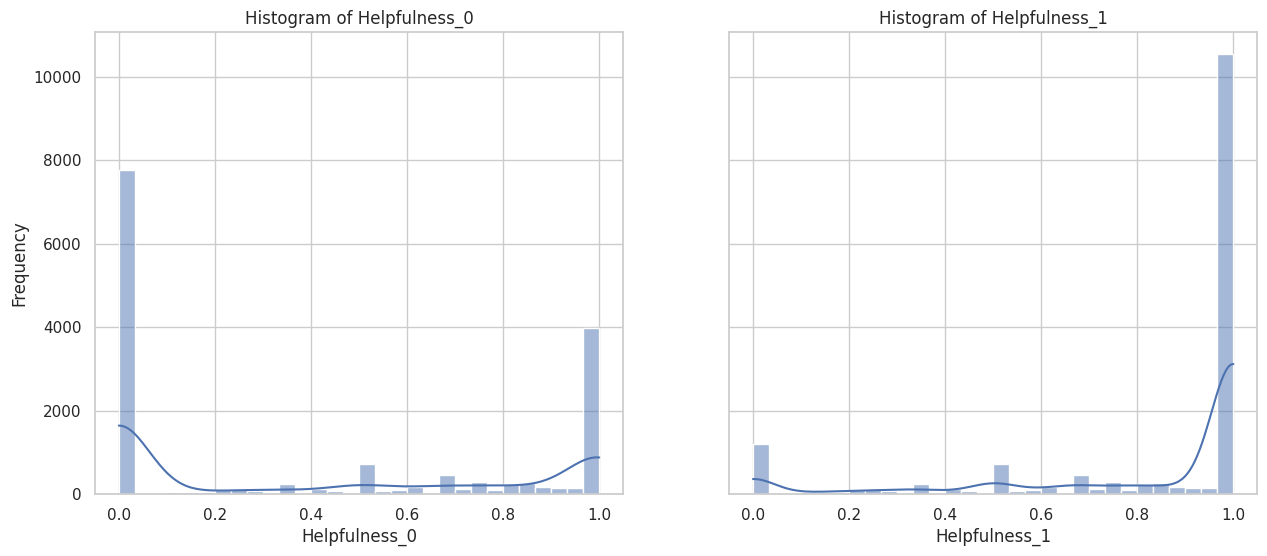

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

sns.set(style="whitegrid")

sns.histplot(df_processed['helpfulness_0'], bins=30, kde=True, ax=axes[0])
axes[0].set_xlabel('Helpfulness_0')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Helpfulness_0')

sns.histplot(df_processed['helpfulness_1'], bins=30, kde=True, ax=axes[1])
axes[1].set_xlabel('Helpfulness_1')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Helpfulness_1')

plt.show()

In [72]:
#Correlation Analysis 
df_processed[['helpfulness_0','helpfulness_1','review']].corr().style.background_gradient(cmap='Blues')

,helpfulness_0,helpfulness_1,review
helpfulness_0,1.000000,0.172201,-0.009705
helpfulness_1,0.172201,1.000000,0.290022
review,-0.009705,0.290022,1.000000


Correlation matrix shows that helpfulness_0 and helpfulness_1 are not much correlated. Based on the correlation with 'review' column, helpfulness_1 is kept and helpfulness_0 is removed.

In [73]:
df_processed = df_processed.drop(['helpfulness_0'], axis=1)
df_processed['helpfulness'] = df_processed['helpfulness_1']
df_processed = df_processed.drop(['helpfulness_1'], axis=1)
df_processed.sample(5)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
3915,5.0,it&#34;s a great read. makes me wish i had liv...,2013,"[Mark Twain, BookCaps Study Guides Staff]",NaN,NaN,2012,1.0
10632,5.0,Alice in Wonderland is an all time classic sto...,2013,[Lewis Carroll],The Floating Press,[Fiction],2009,1.0
177,5.0,With my fourth college freshman ensconced in c...,2005,"[Richard Kadison, Theresa Foy DiGeronimo]",Jossey-Bass,[Education],2005,1.0
13940,3.0,This is a book that will push you to create so...,2011,[Seth Godin],Penguin UK,[Business & Economics],2005,1.0
4935,5.0,This book is a diary of a devoted man of God i...,2012,[David Brainerd],Readaclassic.com,[Biography & Autobiography],2010,1.0


### Authors

Authors Names Standarization

During the Exploratory Data Analysis it was discovered that some authors are reviewed under diferent formats of their names. Based on this, the Dataset is simplified to contain only one name format.

In [74]:
author_mapping = {
    'John Ronald Reuel Tolkien':'J. R. R. Tolkien',
    'J. R. R. Tolkien':'J. R. R. Tolkien',
    'J.R.R. Tolkien':'J. R. R. Tolkien',
    'Gabriel Garcia Marquez':'Gabriel Garcia Marquez',
    'Gabriel García Márquez':'Gabriel Garcia Marquez',
    'Charlotte Brontë':'Charlotte Brontë',
    'Charlotte Bronte':'Charlotte Brontë',
    'Emily Brontë':'Emily Brontë',
    'Emily Bronte':'Emily Brontë',
    'Joseph Smith':'Joseph Smith',
    'Joseph Smith (Jr.)':'Joseph Smith',
    'Jr.':'Joseph Smith'
    }

In [75]:
def standardize_authors(authors):
    if isinstance(authors, list):
        return [author_mapping.get(author, author) for author in authors]
    else:
        return authors  # Return the original value if it's not a list

In [76]:
df_processed['authors'] = df_processed['authors'].apply(standardize_authors)

Updating the Authors Feature to Categorical, and applying Pareto Principe to reduce the quantity of authors.

In [77]:
author_counts = df_processed['authors'].explode().value_counts()
author_counts

authors
J. R. R. Tolkien       594
Lewis Carroll          148
C. S. Lewis            129
Christopher Paolini    111
Charles Dickens        106
                      ... 
Jennifer Quasha          1
Alan Wood                1
Tim Reeser               1
Steve Kaplan             1
Jack D. Herrington       1
Name: count, Length: 7736, dtype: int64

In [78]:
sorted_author_counts = author_counts.sort_values(ascending=False)
sorted_author_counts

authors
J. R. R. Tolkien       594
Lewis Carroll          148
C. S. Lewis            129
Christopher Paolini    111
Charles Dickens        106
                      ... 
Paul H. Lange            1
Christine Adamec         1
The Phat Phree           1
Andru J. Reeve           1
Jack D. Herrington       1
Name: count, Length: 7736, dtype: int64

In [80]:
pareto_threshold = int(0.2 * len(sorted_author_counts))
print(f'Pareto Threshold will keep the {pareto_threshold} most important books')
top_authors = sorted_author_counts.iloc[:pareto_threshold].index
top_authors[:10]

Pareto Threshold will keep the 1547 most important books


Index(['J. R. R. Tolkien', 'Lewis Carroll', 'C. S. Lewis',
       'Christopher Paolini', 'Charles Dickens', 'Aldous Huxley',
       'Eckhart Tolle', 'Viktor E Frankl', 'James Patterson',
       'Arthur Conan Doyle'],
      dtype='object', name='authors')

In [82]:
df_processed['authors'] = df_processed['authors'].apply(lambda x: [author if author in top_authors else 'Other' for author in x] if isinstance(x, list) else ['Other'])

After applying Pareto Principle, there are still 1548 unique authors on the dataset. If authors is considered as a Categorical Feature, it will not have much predictive because it has a lot of Cardinality.

Top 10 authors with most reviews are kept and the rest of authors are set to 'Other'.

In [90]:
authors = df_processed['authors'].explode()
print(f'Total of Authors: {len(authors.unique())}\n')

author_counts = authors.value_counts(ascending=False)
print(f'Total of entries after explode authors column {author_counts.sum()}\n')

# Taking the Top 10 Most important Books
top_10_authors_counts = author_counts[:10].sort_values(ascending=False)

other_authors_counts = author_counts[10:]

df_processed['authors'] = df_processed['authors'].apply(lambda x: [author if author in top_10_authors_counts else 'Other' for author in x] if isinstance(x, list) else ['Other'])
authors_count = df_processed['authors'].explode().value_counts()
print(f'Authors after preprocesing:\n {authors_count}\n')

Total of Authors: 10

Total of entries after explode authors column 18914

Authors after preprocesing:
 authors
Other                  17524
J. R. R. Tolkien         594
Lewis Carroll            148
C. S. Lewis              129
Christopher Paolini      111
Charles Dickens          106
Aldous Huxley             85
Eckhart Tolle             78
Viktor E Frankl           74
James Patterson           65
Name: count, dtype: int64



Some of the Author lists became a list of  ['Other', 'Other', ..., 'Other']

In [91]:
def remove_repeated_values(in_list):
    unique_list = []
    for item in in_list:
        if item not in unique_list:
            unique_list.append(item)

    return unique_list

In [92]:
df_processed.sample(5, random_state=10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
13339,4.0,You can not deny that Donald Trump is a genius...,2004,[Other],Currency,[Business & Economics],2004,0.933333
3312,4.0,This book was recommended reading to me by a r...,2010,[Other],Houghton Mifflin Harcourt,[Juvenile Nonfiction],2010,1.000000
1612,4.0,Bren finds himself in the midst of a civil war...,2007,[Other],DAW Hardcover,[Fiction],2007,1.000000
6630,5.0,Great Price with Excellent and Timely Service;...,2012,"[Other, Other]",Piatkus Books,"[Dallas, Eve (Fictitious character)]",2012,1.000000
14462,4.0,This book was wonderful and i wish it was a se...,2012,[Other],Yearling,[Juvenile Fiction],2011,1.000000


In [93]:
df_processed['authors'] = df_processed['authors'].apply(lambda x: remove_repeated_values(x))
df_processed.sample(5, random_state=10)

,review,text,review_year,authors,publisher,categories,published_year,helpfulness
13339,4.0,You can not deny that Donald Trump is a genius...,2004,[Other],Currency,[Business & Economics],2004,0.933333
3312,4.0,This book was recommended reading to me by a r...,2010,[Other],Houghton Mifflin Harcourt,[Juvenile Nonfiction],2010,1.000000
1612,4.0,Bren finds himself in the midst of a civil war...,2007,[Other],DAW Hardcover,[Fiction],2007,1.000000
6630,5.0,Great Price with Excellent and Timely Service;...,2012,[Other],Piatkus Books,"[Dallas, Eve (Fictitious character)]",2012,1.000000
14462,4.0,This book was wonderful and i wish it was a se...,2012,[Other],Yearling,[Juvenile Fiction],2011,1.000000


In [94]:
df_processed['authors'].explode().value_counts()

authors
Other                  14364
J. R. R. Tolkien         594
Lewis Carroll            148
C. S. Lewis              129
Christopher Paolini      111
Charles Dickens          106
Aldous Huxley             85
Eckhart Tolle             78
Viktor E Frankl           74
James Patterson           65
Name: count, dtype: int64

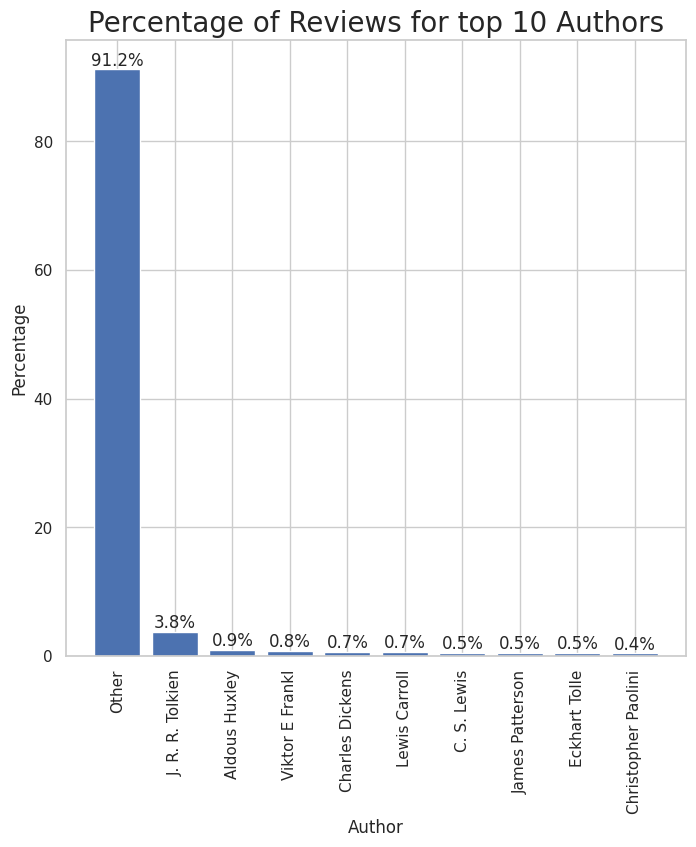

In [95]:
#Show a barplot by Percentages
author_percetage = df_processed['authors'].explode().value_counts()/df_processed['authors'].explode().value_counts().sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_processed['authors'].explode().unique(), author_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Author')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Authors', fontsize = 20)
plt.show()

Top 10 authors only represents the 8.8% of the Total Dataset Reviews. Beacause of the Cardinality of this feature, Authors is removed from the Dataset.

In [96]:
df_processed = df_processed.drop(['authors'], axis=1)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15738 entries, 0 to 15737
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review          15738 non-null  float64
 1   text            15738 non-null  object 
 2   review_year     15738 non-null  int64  
 3   publisher       14295 non-null  object 
 4   categories      15441 non-null  object 
 5   published_year  15738 non-null  int64  
 6   helpfulness     15738 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 860.8+ KB


### Categories

Updating the Categories Feature to Categorical, and applying Pareto Principe to reduce the quantity of Categories.

In [102]:
categories_counts = df_processed['categories'].explode().value_counts(ascending=False)

pareto_threshold = int(0.2 * len(categories_counts))
print(f'Pareto Threshold will keep the {pareto_threshold} most important Categories\n')

top_categories = categories_counts.iloc[:pareto_threshold].index
print(f'Top Categories:\n {top_categories[:10]}')

df_processed['categories'] = df_processed['categories'].apply(lambda x: [category if category in top_categories else 'Other' for category in x] if isinstance(x, list) else ['Other'])

Pareto Threshold will keep the 87 most important Categories

Top Categories:
 Index(['Fiction', 'Juvenile Fiction', 'Religion', 'Biography & Autobiography',
       'History', 'Business & Economics', 'Self-Help', 'Computers',
       'Family & Relationships', 'Cooking'],
      dtype='object', name='categories')


After applying Pareto Principle, there are still 117 unique categories on the dataset. If categories is considered as a Categorical Feature, it will not add much predictive value because it has a lot of Cardinality.

Top 10 categories with most reviews are kept and the rest of categories are set to 'Other'.

In [104]:
categories = df_processed['categories'].explode()

print(f'Total of Categories: {len(categories.unique())}')

categories_counts = categories.value_counts(ascending=False)
print(f'Total of entries after explode Categories column {categories_counts.sum()}')

Total of Categories: 88
Total of entries after explode Categories column 16030


In [105]:
top_categories_counts = categories_counts[:10].sort_values(ascending=False)
top_categories_counts

categories
Fiction                      5102
Juvenile Fiction             1483
Other                         939
Religion                      826
Biography & Autobiography     774
History                       595
Business & Economics          513
Self-Help                     293
Computers                     290
Family & Relationships        272
Name: count, dtype: int64

In [108]:
categories_mapping = {
    'Fiction' : 'Fiction',
    'Juvenile Fiction' : 'Fiction',
    'Young Adult Fiction': 'Fiction',
    'Fantasy fiction' : 'Fiction',
    'FICTION': 'Fiction'
}

In [109]:
def standardize_categories(categories):
    if isinstance(categories, list):
        return [categories_mapping.get(category, category) for category in categories]
    else:
        return categories  # Return the original value if it's not a list

In [110]:
df_processed['categories'] = df_processed['categories'].apply(standardize_categories)

In [111]:
categories = df_processed['categories'].explode()
categories_counts = categories.value_counts(ascending=False)

top_10_categories_counts = categories_counts[:10].sort_values(ascending=False)
print(f'Top 10 Categories:\ {top_10_categories_counts}')

Top 10 Categories:\ categories
Fiction                      6717
Other                         939
Religion                      826
Biography & Autobiography     774
History                       595
Business & Economics          513
Self-Help                     293
Computers                     290
Family & Relationships        272
Cooking                       233
Name: count, dtype: int64


In [112]:
df_processed['categories'] = df_processed['categories'].apply(lambda x: [category if category in top_10_categories_counts else 'Other' for category in x] if isinstance(x, list) else ['Other'])
df_processed['categories'].explode().value_counts()

categories
Fiction                      6717
Other                        5517
Religion                      826
Biography & Autobiography     774
History                       595
Business & Economics          513
Self-Help                     293
Computers                     290
Family & Relationships        272
Cooking                       233
Name: count, dtype: int64

Some categories list remained with the formar ['Other', 'Other', ..., 'Other']

In [113]:
df_processed['categories'] = df_processed['categories'].apply(lambda x: remove_repeated_values(x))
df_processed.sample(5, random_state=5)

,review,text,review_year,publisher,categories,published_year,helpfulness
10054,4.0,Measle and the Dragodon is the sequel to the s...,2006,Harper Collins,[Fiction],2005,1.000000
4711,5.0,My husband and I presented this Bible to our s...,2007,Holman Bible Pub,[Other],2004,0.888889
5154,5.0,Swush! Eragon and Saphira Gliding through the ...,2007,Random House,[Other],2005,0.333333
1619,5.0,This is a great book that I loved many years a...,2013,"Sourcebooks, Inc.",[Fiction],2009,1.000000
12668,5.0,"I must have read every ""In Death"" published by...",2012,Berkley,[Fiction],2005,1.000000


In [114]:
df_processed['categories'].explode().value_counts(ascending=False)

categories
Fiction                      6717
Other                        5226
Religion                      826
Biography & Autobiography     774
History                       595
Business & Economics          513
Self-Help                     293
Computers                     290
Family & Relationships        272
Cooking                       233
Name: count, dtype: int64

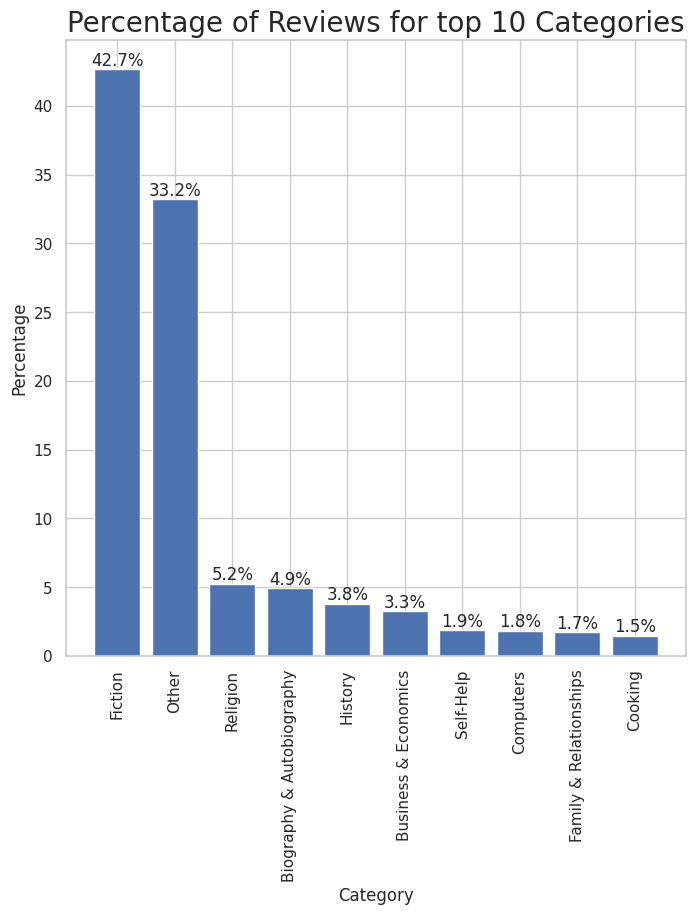

In [115]:
#Show a barplot by Percentages
category_percetage = df_processed['categories'].explode().value_counts(ascending=False)/df_processed['categories'].explode().value_counts(ascending=False).sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_processed['categories'].explode().value_counts(ascending=False).keys(), category_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Categories', fontsize = 20)
plt.show()

Fiction is the most represented Category in the Dataset. All the other categories do not have much representation, and there is a lot of cardinality for this feature. This variable is binarize to [Fiction = 1, No Fiction = 0] in order to keep the most representatice category and use this feature predicting capacity.

In [116]:
print(f'df_processed shape before explode by category: {df_processed.shape}')
df_processed = df_processed.explode('categories')
print(f'df_processed shape after explode by category: {df_processed.shape}')

df_processed shape before explode by category: (15738, 7)
df_processed shape after explode by category: (15739, 7)


In [120]:
df_processed.sample(5, random_state=5)

,review,text,review_year,publisher,categories,published_year,helpfulness
10054,4.0,Measle and the Dragodon is the sequel to the s...,2006,Harper Collins,Fiction,2005,1.000000
4711,5.0,My husband and I presented this Bible to our s...,2007,Holman Bible Pub,Other,2004,0.888889
5154,5.0,Swush! Eragon and Saphira Gliding through the ...,2007,Random House,Other,2005,0.333333
1619,5.0,This is a great book that I loved many years a...,2013,"Sourcebooks, Inc.",Fiction,2009,1.000000
15206,5.0,This was one of the wedding gifts my husband a...,2011,Penguin,Fiction,2011,1.000000


In [134]:
df_processed['fiction_category'] = df_processed['categories'].apply(lambda x: 1 if x=='Fiction' else 0)
df_processed.sample(5, random_state=5)

,review,text,review_year,publisher,categories,published_year,helpfulness,fiction_category
10054,4.0,Measle and the Dragodon is the sequel to the s...,2006,Harper Collins,1,2005,1.000000,1
4711,5.0,My husband and I presented this Bible to our s...,2007,Other,0,2004,0.888889,0
5154,5.0,Swush! Eragon and Saphira Gliding through the ...,2007,Random House,0,2005,0.333333,0
1619,5.0,This is a great book that I loved many years a...,2013,Other,1,2009,1.000000,1
15206,5.0,This was one of the wedding gifts my husband a...,2011,Penguin,1,2011,1.000000,1


In [135]:
df_processed = df_processed.drop(['categories'], axis=1)

### Publisher

Some publisher names represents the same Publisher. The publisher names are standarized

In [123]:
publisher_mapping = {
    'Penguin UK':'Penguin',
    'HarperCollins': 'Harper Collins',
    'HarperCollins UK' :  'Harper Collins',
    'Adams Media Corporation': 'Adams Media',
    'Addison Wesley Longman' : 'Addison-Wesley',
    'Addison Wesley Publishing Company':'Addison-Wesley',
    'Addison-Wesley Longman':'Addison-Wesley',
    'Addison-Wesley Professional' : 'Addison-Wesley',
    '''"O'Reilly Media, Inc."''' : "O'Reilly Media, Inc.",
    '*Frommers' : 'Frommers',
    '*Howell Book House' : 'Howell Book House',
    }

In [124]:
def standardize_publisher(publisher):
    if pd.isna(publisher):        
        return publisher  # Return the original value if it's not a list
    else:

        return publisher_mapping.get(publisher, publisher)

In [125]:
df_processed['publisher'] = df_processed['publisher'].apply(standardize_publisher)

In [127]:
publisher_counts = df_processed['publisher'].value_counts(ascending=False)
publisher_counts

publisher
Penguin                           1228
Harper Collins                     946
Simon and Schuster                 854
Mariner Books                      500
Random House                       358
                                  ... 
Bookman Publishing & Marketing       1
Basic Health Publications            1
Nbm Publishing Company               1
Infinite Ideas                       1
Dewi Lewis Pub                       1
Name: count, Length: 1806, dtype: int64

Updating the publisher Feature to Categorical, and applying Pareto Principe to reduce the quantity of publishers.

In [128]:
pareto_threshold = int(0.2 * len(publisher_counts))

print(f'Pareto Threshold will keep the {pareto_threshold} most important Publishers\n')

top_publishers = publisher_counts.iloc[:pareto_threshold].index
print(f'Top Publishers:\n {top_publishers[:10]}')

df_processed['publisher'] = df_processed['publisher'].apply(lambda publisher: publisher if publisher in top_publishers else 'Other')

Pareto Threshold will keep the 361 most important Publishers

Top Publishers:
 Index(['Penguin', 'Harper Collins', 'Simon and Schuster', 'Mariner Books',
       'Random House', 'Macmillan', 'Vintage', 'Houghton Mifflin Harcourt',
       'Anchor', 'Bantam'],
      dtype='object', name='publisher')


After applying Pareto Principle, there are still 361 unique publishers on the dataset. If publishers is considered as a Categorical Feature, it will not add much predictive value because it has a lot of Cardinality.

Top 10 publishers with most reviews are kept and the rest of publishers are set to 'Other'. In order to keep the feature and analize the predicting power.

In [130]:
publishers = df_processed['publisher']

print(f'Total of Publishers: {len(publishers.unique())}')

publisher_counts = publishers.value_counts(ascending=False)

top_10_publishers_counts = publisher_counts[:10].sort_values(ascending=False)

df_processed['publisher'] = df_processed['publisher'].apply(lambda publisher: publisher if publisher in top_10_publishers_counts else 'Other')

Total of Publishers: 362


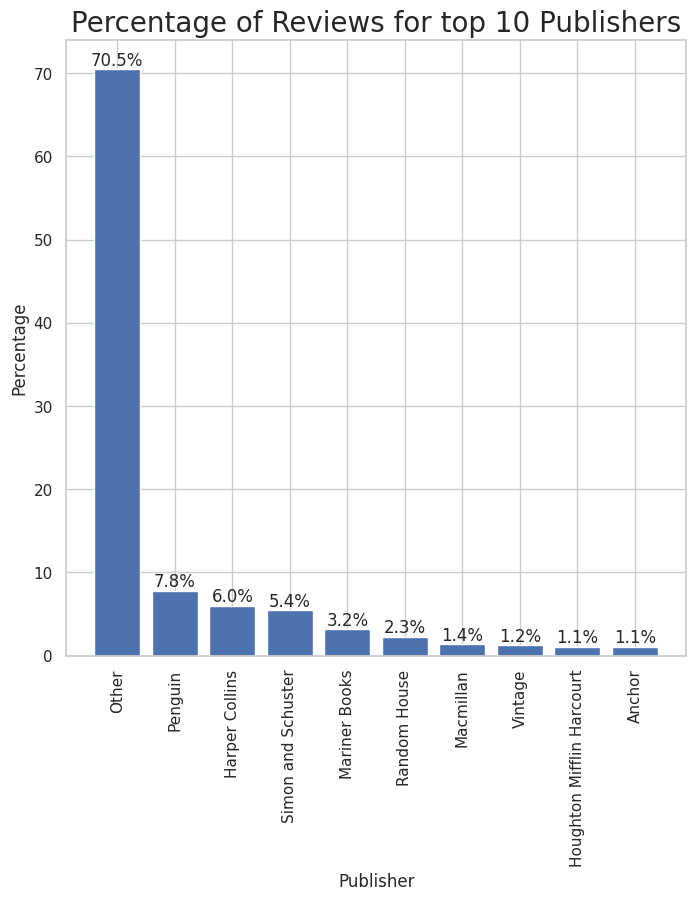

In [132]:
#Show a barplot by Percentages
publisher_percetage = df_processed['publisher'].value_counts(ascending=False)/df_processed['publisher'].value_counts(ascending=False).sum()*100

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(df_processed['publisher'].value_counts(ascending=False).keys(), publisher_percetage)

# Set the bar labels (percentages) to be displayed above the bars
ax.bar_label(bars, fmt='%.1f%%')

plt.xlabel('Publisher')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.title('Percentage of Reviews for top 10 Publishers', fontsize = 20)
plt.show()


Top 10 publishers different than Other represents the 29.5% of the dataset. The representation of non-other publishers is low, but is grather than 25%, so the variable is kept. In this case the Publisher variable is binarize as as follows [known_publisher = 1, Unknown_publisher = 0]

In [139]:
df_processed['top_publisher'] = df_processed['publisher'].apply(lambda x: 0 if x=='Other' else 1)
df_processed = df_processed.drop(['publisher'], axis=1)
df_processed.sample(5, random_state=5)

,review,text,review_year,published_year,helpfulness,fiction_category,top_publisher
10054,4.0,Measle and the Dragodon is the sequel to the s...,2006,2005,1.000000,1,1
4711,5.0,My husband and I presented this Bible to our s...,2007,2004,0.888889,0,0
5154,5.0,Swush! Eragon and Saphira Gliding through the ...,2007,2005,0.333333,0,1
1619,5.0,This is a great book that I loved many years a...,2013,2009,1.000000,1,0
15206,5.0,This was one of the wedding gifts my husband a...,2011,2011,1.000000,1,1


# Text Preprocesing and Sentiment Analysis

In [140]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15739 entries, 0 to 15737
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review            15739 non-null  float64
 1   text              15739 non-null  object 
 2   review_year       15739 non-null  int64  
 3   published_year    15739 non-null  int64  
 4   helpfulness       15739 non-null  float64
 5   fiction_category  15739 non-null  int64  
 6   top_publisher     15739 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 983.7+ KB


In [141]:
# Text To Lower
df_processed['text_clean'] = df_processed['text'].str.lower()
# Extract special characters and numbers
df_processed['text_clean'] = df_processed['text_clean'].str.replace(r'[^a-z]', ' ', regex=True)
# Extract numbers
# df_reduced['text_clean'] = df_reduced['text_clean'].str.replace(r'[\d]+', '', regex=True)
# Change multiple white spaces to a single white space
df_processed['text_clean'] = df_processed['text_clean'].str.replace(r'\s+',' ',regex=True)

In [142]:
#Lemmatize Text and removing Stopwords
download("wordnet")
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/arnaldochm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [143]:
# Download Stop Words
download("stopwords")
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arnaldochm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [144]:
def lemmatize_text(words, lemmatizer = lemmatizer):
    words = words.split(' ')
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 2] #Keep Words with more than 3 letters
    return ' '.join(tokens)

In [146]:
df_processed["text_clean"] = df_processed["text_clean"].apply(lambda x: lemmatize_text(x))
df_processed.sample(5, random_state=5)

,review,text,review_year,published_year,helpfulness,fiction_category,top_publisher,text_clean
10054,4.0,Measle and the Dragodon is the sequel to the s...,2006,2005,1.000000,1,1,measle dragodon sequel successful measle wrath...
4711,5.0,My husband and I presented this Bible to our s...,2007,2004,0.888889,0,0,husband presented bible son gift prior enterin...
5154,5.0,Swush! Eragon and Saphira Gliding through the ...,2007,2005,0.333333,0,1,swush eragon saphira gliding air like bolt lig...
1619,5.0,This is a great book that I loved many years a...,2013,2009,1.000000,1,0,great book loved many year ago happy find avai...
15206,5.0,This was one of the wedding gifts my husband a...,2011,2011,1.000000,1,1,one wedding gift husband received already turn...


In [147]:
#Download Readability test library
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/arnaldochm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

The Flesch-Kincaid Grade Level (FKGL) is a readability test designed to assess the readability of written text
It's a commonly used formula to determine the level of education one would need to understand a piece of text. 
The FKGL provides a grade level score, which is roughly equivalent to the U.S. grade level in education. For example, a text with an FKGL score of 8.0 would be considered readable by an eighth-grader.

The formula for calculating the Flesch-Kincaid Grade Level is as follows:

$FKGL = 0.39 \left( \frac{{\text{{total words}}}}{{\text{{total sentences}}}} \right) + 11.8 \left( \frac{{\text{{total syllables}}}}{{\text{{total words}}}} \right) - 15.59$


- "total words" represents the number of words in the text.
- "total sentences" represents the number of sentences in the text.
- "total syllables" represents the number of syllables in the text.

The expected results for FKGL are as follows:

- 0-6: Easy to read, typically understandable by an average 11-year-old student or below.
- 6-8: Readable by a 12-14-year-old student (7th to 8th grade).
- 8-10: Readable by a 14-16-year-old student (9th to 10th grade).
- 10-12: Readable by a 16-18-year-old student (11th to 12th grade).
- 12-14: Readable by a college graduate.
- 14-16: Readable by someone with a post-graduate education.

In [148]:
def calculate_complexity(review):
    return flesch_kincaid_grade(review)

Text complexity is calculated from original text. To keep the words from the user review

In [150]:
df_processed['text_complexity'] = df_processed['text'].apply(calculate_complexity)
df_processed.sample(5, random_state=5)

,review,text,review_year,published_year,helpfulness,fiction_category,top_publisher,text_clean,text_complexity
10054,4.0,Measle and the Dragodon is the sequel to the s...,2006,2005,1.000000,1,1,measle dragodon sequel successful measle wrath...,11.9
4711,5.0,My husband and I presented this Bible to our s...,2007,2004,0.888889,0,0,husband presented bible son gift prior enterin...,6.0
5154,5.0,Swush! Eragon and Saphira Gliding through the ...,2007,2005,0.333333,0,1,swush eragon saphira gliding air like bolt lig...,7.7
1619,5.0,This is a great book that I loved many years a...,2013,2009,1.000000,1,0,great book loved many year ago happy find avai...,6.4
15206,5.0,This was one of the wedding gifts my husband a...,2011,2011,1.000000,1,1,one wedding gift husband received already turn...,5.9


Text Column is removed after calculating complexity as it is not used any more

In [151]:
df_processed = df_processed.drop(['text'],axis=1)

In [152]:
# Download Vader Lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/arnaldochm/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [153]:
vaderSentimentAnalyzer = SentimentIntensityAnalyzer()

In [156]:
print(df_processed.iloc[67]["text_clean"])
vaderSentimentAnalyzer.polarity_scores(df_processed.iloc[67]['text_clean'])

goethe expressed fundamental truth nothing much philosophy footnote plato plotinus year later plato eliminated platonic dabbling politics quietly separated greek mysticism emerging fundamentalism christianity became somewhat bemusedly cult figure right brian hines deal subject hugely sympathatic way hope future something doe change time plato century close one timeless truth time well according plotinus father robin


{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.8344}

In [159]:
df_processed['scores']=df_processed['text_clean'].apply(lambda body: vaderSentimentAnalyzer.polarity_scores(str(body)))

Compound represents the sentiment of the text. It goes from -1 to 1. As near as the value is to 1, the text is more positive, and as more negative the value is, the text sentiment is more negative. When compound is 0, the sentiment is neutral.

A thresshold can be used to categorize the value as Postive, Negative or Neutral, bu the numerical value is used instead to keep all the variance of the variable.

In [158]:
df_processed['compound_sentiment']=df_processed['scores'].apply(lambda score_dict:score_dict['compound'])


,review,review_year,published_year,helpfulness,fiction_category,top_publisher,text_clean,text_complexity,scores,compound_sentiment
0,4.0,2007,2005,1.0,1,0,purchased book neice cruised week loved story ...,4.5,"{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...",0.9623
1,5.0,2007,2005,1.0,0,1,really enjoyed book several front author terri...,9.0,"{'neg': 0.12, 'neu': 0.58, 'pos': 0.3, 'compou...",0.9895
2,5.0,2012,2004,1.0,0,1,interesting informative spot good book read wa...,6.0,"{'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'comp...",0.7096
3,5.0,2004,2004,1.0,0,0,must learn past history better appreciate toda...,6.7,"{'neg': 0.091, 'neu': 0.566, 'pos': 0.343, 'co...",0.9595
4,2.0,2008,2008,1.0,0,0,began book high hope cover blurb sounded inter...,10.7,"{'neg': 0.086, 'neu': 0.667, 'pos': 0.247, 'co...",0.9936


In [160]:
df_processed = df_processed.drop(['scores'], axis=1)
df_processed.sample(5, random_state=5)

,review,review_year,published_year,helpfulness,fiction_category,top_publisher,text_clean,text_complexity,compound_sentiment
10054,4.0,2006,2005,1.000000,1,1,measle dragodon sequel successful measle wrath...,11.9,-0.7430
4711,5.0,2007,2004,0.888889,0,0,husband presented bible son gift prior enterin...,6.0,0.9432
5154,5.0,2007,2005,0.333333,0,1,swush eragon saphira gliding air like bolt lig...,7.7,0.9531
1619,5.0,2013,2009,1.000000,1,0,great book loved many year ago happy find avai...,6.4,0.9136
15206,5.0,2011,2011,1.000000,1,1,one wedding gift husband received already turn...,5.9,0.9719


A Word Count is performed on the Clean Text to extract the quantity of words in the text as a new variable.

In [161]:
# Function to count words in a text column
def count_words(text):
    tokens = word_tokenize(text)  # Tokenize the text into words
    return len(tokens)

In [162]:
df_processed['word_count'] = df_processed['text_clean'].apply(count_words)
df_processed.sample(5, random_state=5)

,review,review_year,published_year,helpfulness,fiction_category,top_publisher,text_clean,text_complexity,compound_sentiment,word_count
10054,4.0,2006,2005,1.000000,1,1,measle dragodon sequel successful measle wrath...,11.9,-0.7430,118
4711,5.0,2007,2004,0.888889,0,0,husband presented bible son gift prior enterin...,6.0,0.9432,44
5154,5.0,2007,2005,0.333333,0,1,swush eragon saphira gliding air like bolt lig...,7.7,0.9531,217
1619,5.0,2013,2009,1.000000,1,0,great book loved many year ago happy find avai...,6.4,0.9136,10
15206,5.0,2011,2011,1.000000,1,1,one wedding gift husband received already turn...,5.9,0.9719,32


## Outliers removal

In [164]:
df_processed['text_complexity'].describe().T

count    15739.000000
mean         7.305235
std          3.720060
min         -3.100000
25%          5.000000
50%          7.000000
75%          9.200000
max        232.200000
Name: text_complexity, dtype: float64

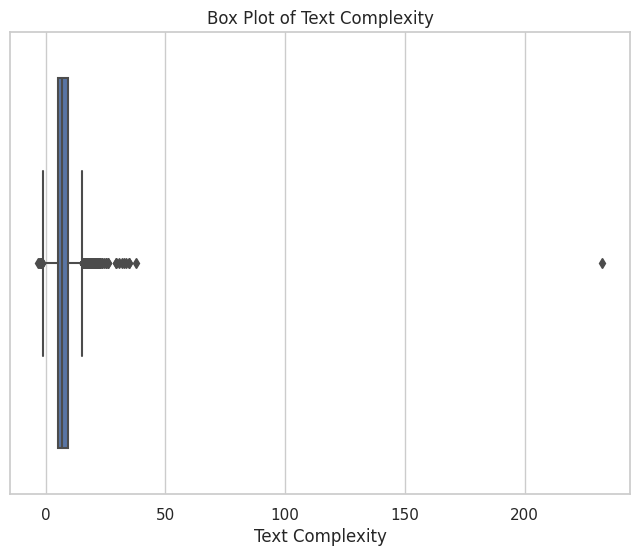

In [165]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_processed, x='text_complexity')
plt.title("Box Plot of Text Complexity")
plt.xlabel("Text Complexity")
plt.show()

In [170]:
text_complexity_outliers = df_processed[df_processed['text_complexity'] > 35].value_counts().sum()

percentage = 100*text_complexity_outliers/df_processed.shape[0]
print(f'Outliers for Text Complexity grather 35 than are removed as they just represent the {percentage:.3f}% of the Dataset')
df_processed = df_processed[df_processed['text_complexity'] <= 35]
df_processed.shape

Outliers for Text Complexity grather than are removed as they just represent the 0.013% of the Dataset


(15737, 10)

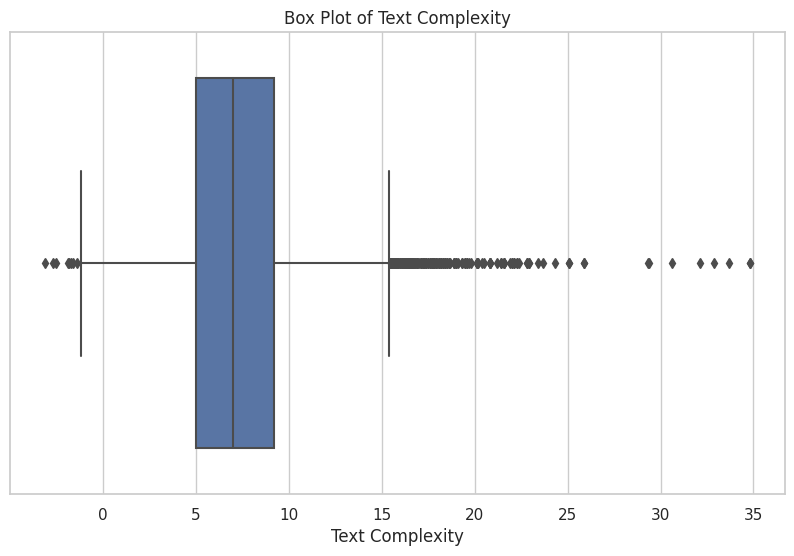

In [175]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_processed, x='text_complexity')
plt.title("Box Plot of Text Complexity")
plt.xlabel("Text Complexity")
plt.show()

Outliers Removal for word count

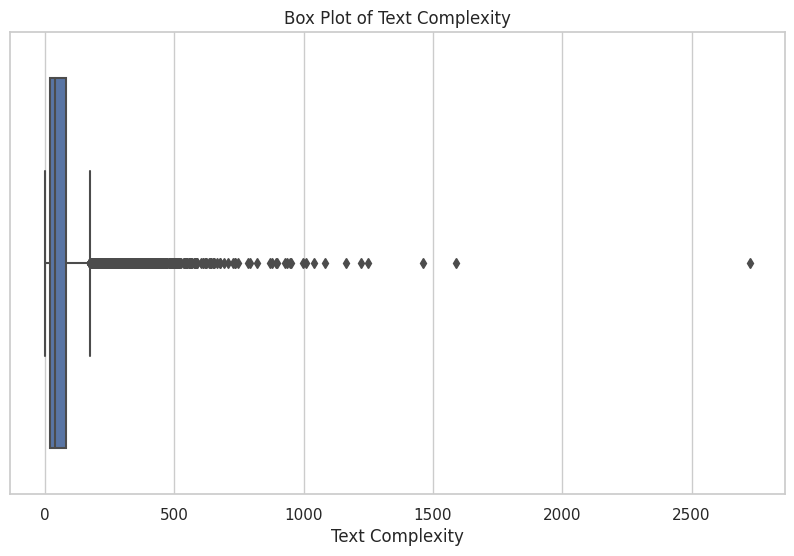

In [176]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_processed, x='word_count')
plt.title("Box Plot of Text Complexity")
plt.xlabel("Text Complexity")
plt.show()

In [177]:
df_processed['word_count'].describe().T

count    15737.000000
mean        67.471246
std         89.432953
min          1.000000
25%         18.000000
50%         37.000000
75%         81.000000
max       2725.000000
Name: word_count, dtype: float64

In [179]:
text_word_count_outliers_count = df_processed[df_processed['word_count'] > 1500].value_counts().sum()
percentage = 100*text_word_count_outliers_count/df_processed.shape[0]
print(f'Outliers for Word Count grather than 1500 are removed as they just represent the {percentage:.3f}% of the Dataset')

df_processed = df_processed[df_processed['word_count'] <= 1500]
df_processed.shape

Outliers for Word Count grather than 1500 are removed as they just represent the 0.000% of the Dataset


(15735, 10)

## Processed Dataset saving

In [181]:
df_processed.to_csv('../data/processed/df_processed.csv')